In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime as dt
import seaborn as sns

In [4]:
arquivo = pd.read_csv('dataset.csv')

In [5]:
df = pd.DataFrame(arquivo)

In [6]:
print(df.columns)

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')


In [7]:
df["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [10]:
#Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'? #

In [11]:
cidade_maior_venda = (
    df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()
)
print(cidade_maior_venda)

New York City


# Pergunta de Negócio 2:Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.
#


In [12]:
df.groupby('Data_Pedido')['Valor_Venda'].sum()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64

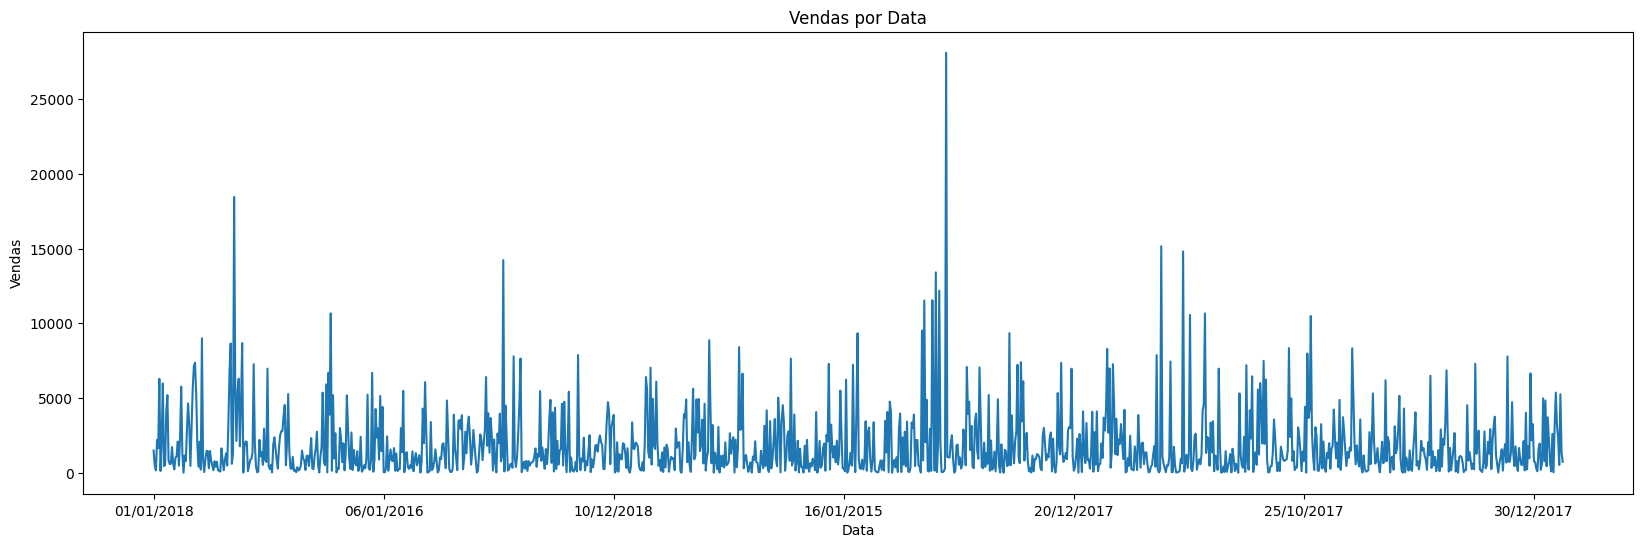

In [13]:
vendas_por_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()
plt.figure(figsize=(20, 6))
vendas_por_data.plot(x='Data_Pedido', y='Valor_Venda', kind='line')
plt.title('Vendas por Data')    
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()

In [14]:
#
# •Pergunta de Negócio 3:Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.
#

In [15]:
vendas_por_estado = df.groupby('Estado')['Valor_Venda'].sum()

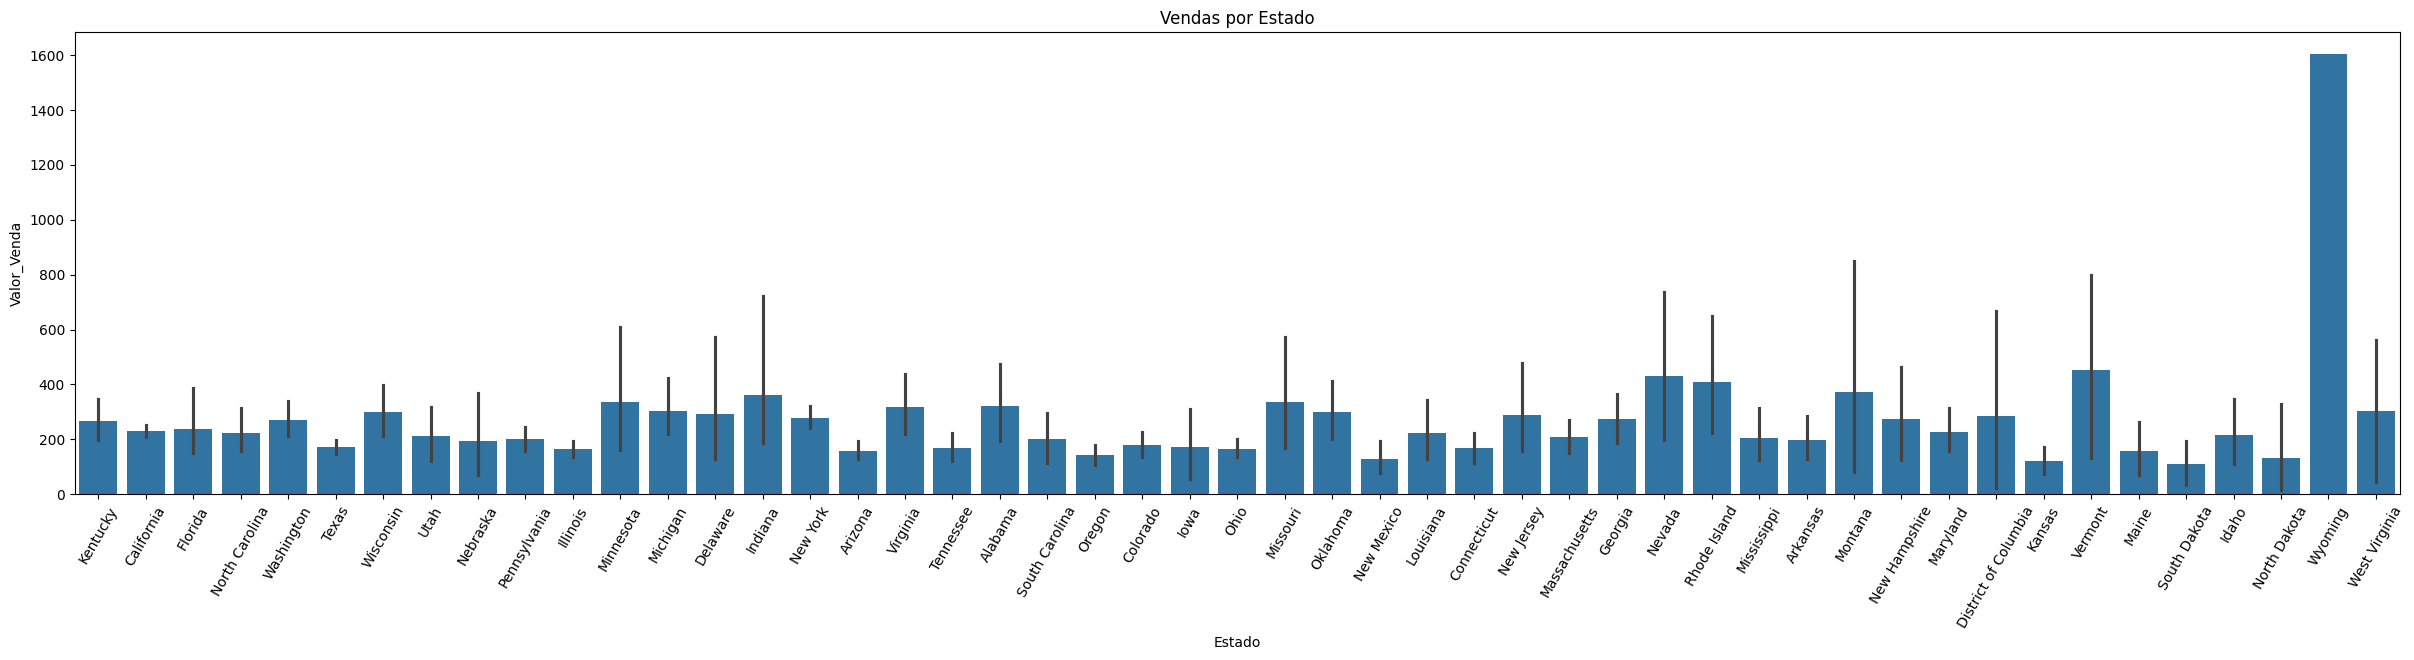

In [16]:
plt.figure(figsize=(30, 6))
sns.barplot(data = df, x='Estado', y='Valor_Venda').set(title='Vendas por Estado')
plt.xticks(rotation=60)
plt.show()

In [17]:
#  •Pergunta de Negócio 4:Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.
# 

In [18]:
df.groupby('Cidade')['Valor_Venda'].sum().nlargest(10)

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64

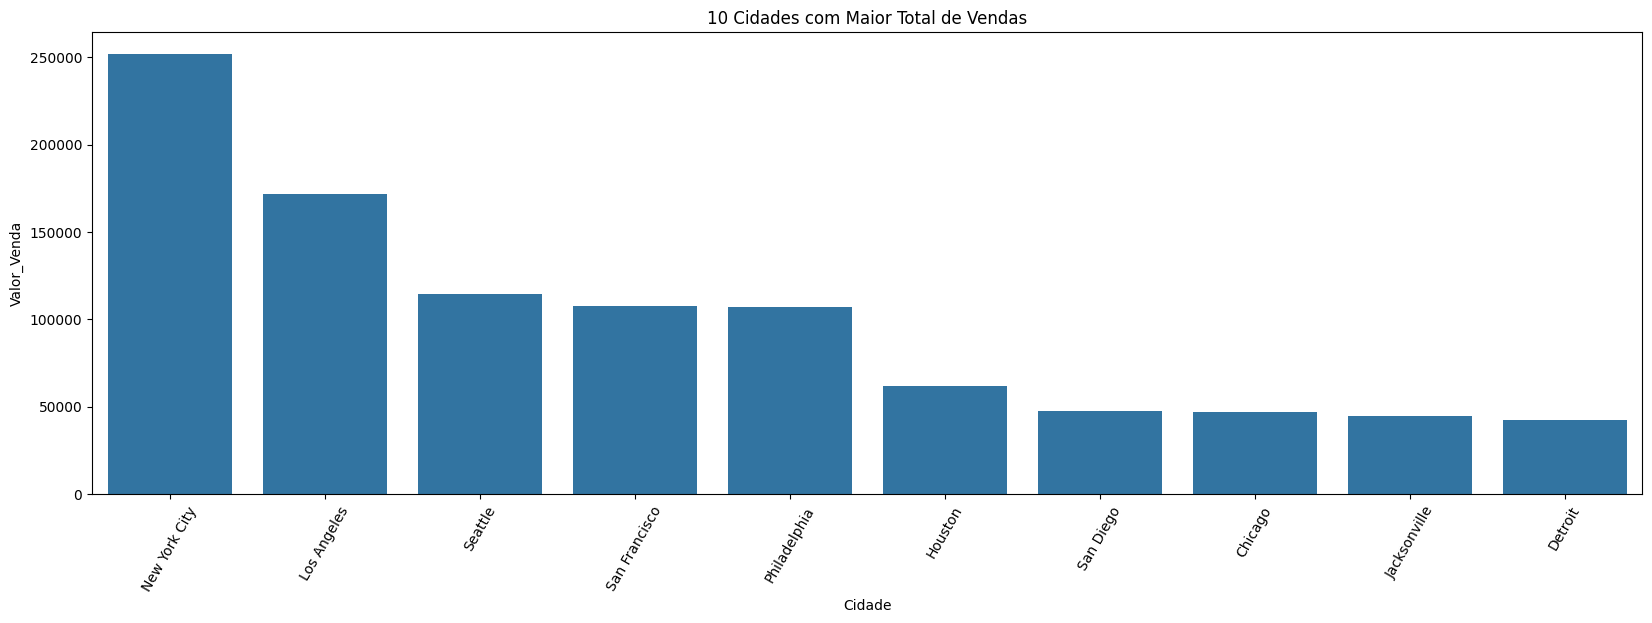

In [19]:
maiores_vendas = df.groupby('Cidade')['Valor_Venda'].sum().nlargest(10)
maiores_vendas = pd.DataFrame(maiores_vendas).reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(data = maiores_vendas,x='Cidade', y='Valor_Venda').set(title='10 Cidades com Maior Total de Vendas')
plt.xticks(rotation=60)
plt.show()

In [20]:
# •Pergunta de Negócio 5:Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.
# 

In [21]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [22]:
df_Valor_Venda_Segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False)

In [23]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' $ {v:d}'.format(v=val)
    return my_format

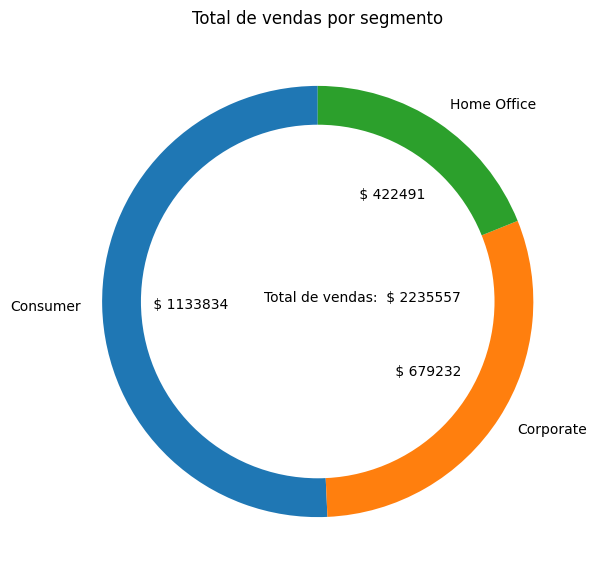

In [24]:
plt.figure(figsize=(20,7))
plt.pie(df_Valor_Venda_Segmento['Valor_Venda'],
        labels = df_Valor_Venda_Segmento['Segmento'], 
        autopct = autopct_format(df_Valor_Venda_Segmento['Valor_Venda']), 
        startangle = 90)

centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = 'Total de vendas: ' ' $ ' + str(int(sum(df_Valor_Venda_Segmento['Valor_Venda']))), xy=(-0.25, 0))
plt.title('Total de vendas por segmento')
plt.show()



In [25]:
# •Pergunta de Negócio 6 (Desafio Nível Baby):Qual o Total de Vendas Por Segmento e Por Ano?

In [26]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)

In [27]:
df['Ano'] = df['Data_Pedido'].dt.year

In [28]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [29]:

df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

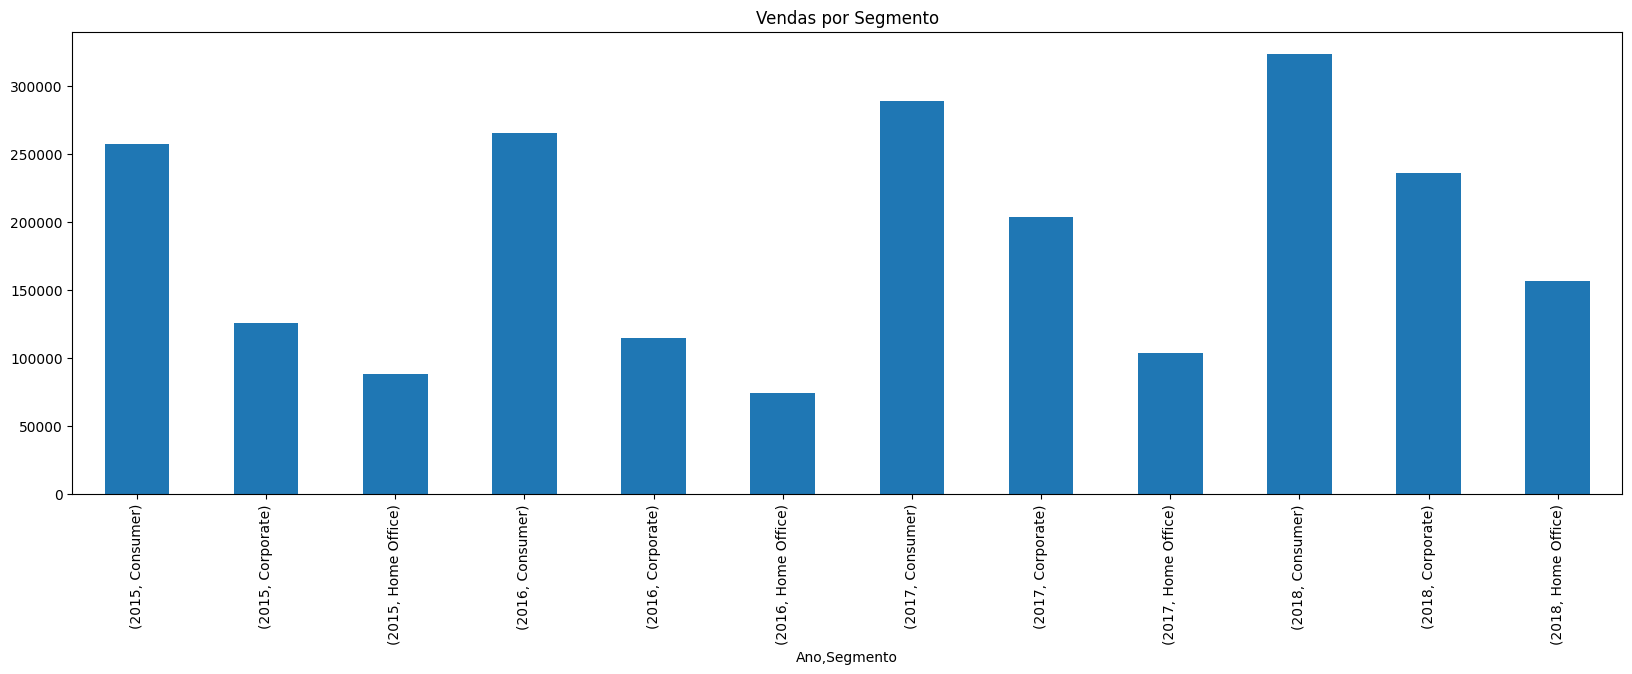

In [30]:
df_data_e_venda_segmento = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
plt.figure(figsize=(20, 6))
df_data_e_venda_segmento.plot(x='Ano', y='Valor_Venda', kind='bar')
plt.title('Vendas por Segmento')
plt.show()

In [31]:
###
# Pergunta de Negócio 7 (Desafio Nível Júnior):Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?
# 

In [32]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Desconto'].value_counts()


Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [33]:
# •Pergunta de Negócio 8 (Desafio Nível Master):Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
# 

In [34]:
df['Media_Valor_Venda_Com_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda']*df['Desconto'])

In [35]:
df.rename(columns={'Media_Valor_Venda_Com_Desconto': 'Valor_Venda_Com_Desconto'}, inplace=True)

In [36]:
valor_venda_antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

In [37]:
valor_venda_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Com_Desconto']

In [38]:
print(valor_venda_antes_desconto.mean())
print(valor_venda_depois_desconto.mean())

2116.8078153172864
1799.2866430196934


In [39]:
#Pergunta de Negócio 9 (Desafio Nível Master Ninja):Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.#

In [40]:
df['Mes'] = df['Data_Pedido'].dt.month

In [41]:

media_vendas_por_segmento = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
media_vendas_por_segmento 




C:\Users\IOMAP1\AppData\Local\Temp\ipykernel_6864\1968369295.py:1: FutureWarning: The provided callable <function sum at 0x00000253FADE1870> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  media_vendas_por_segmento = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\IOMAP1\AppData\Local\Temp\ipykernel_6864\1968369295.py:1: FutureWarning: The provided callable <function mean at 0x00000253FADE2A70> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  media_vendas_por_segmento = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\IOMAP1\AppData\Local\Temp\ipykernel_6864\1968369295.py:1: FutureWarning: The provided callable <function median at 0x00000253FAEED

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [42]:
df['Mes'] = df['Data_Pedido'].dt.month

In [43]:
# Vamos extrair os níveis
anos = media_vendas_por_segmento.index.get_level_values(0)
meses = media_vendas_por_segmento.index.get_level_values(1)
segmentos = media_vendas_por_segmento.index.get_level_values(2)


<Figure size 2000x600 with 0 Axes>

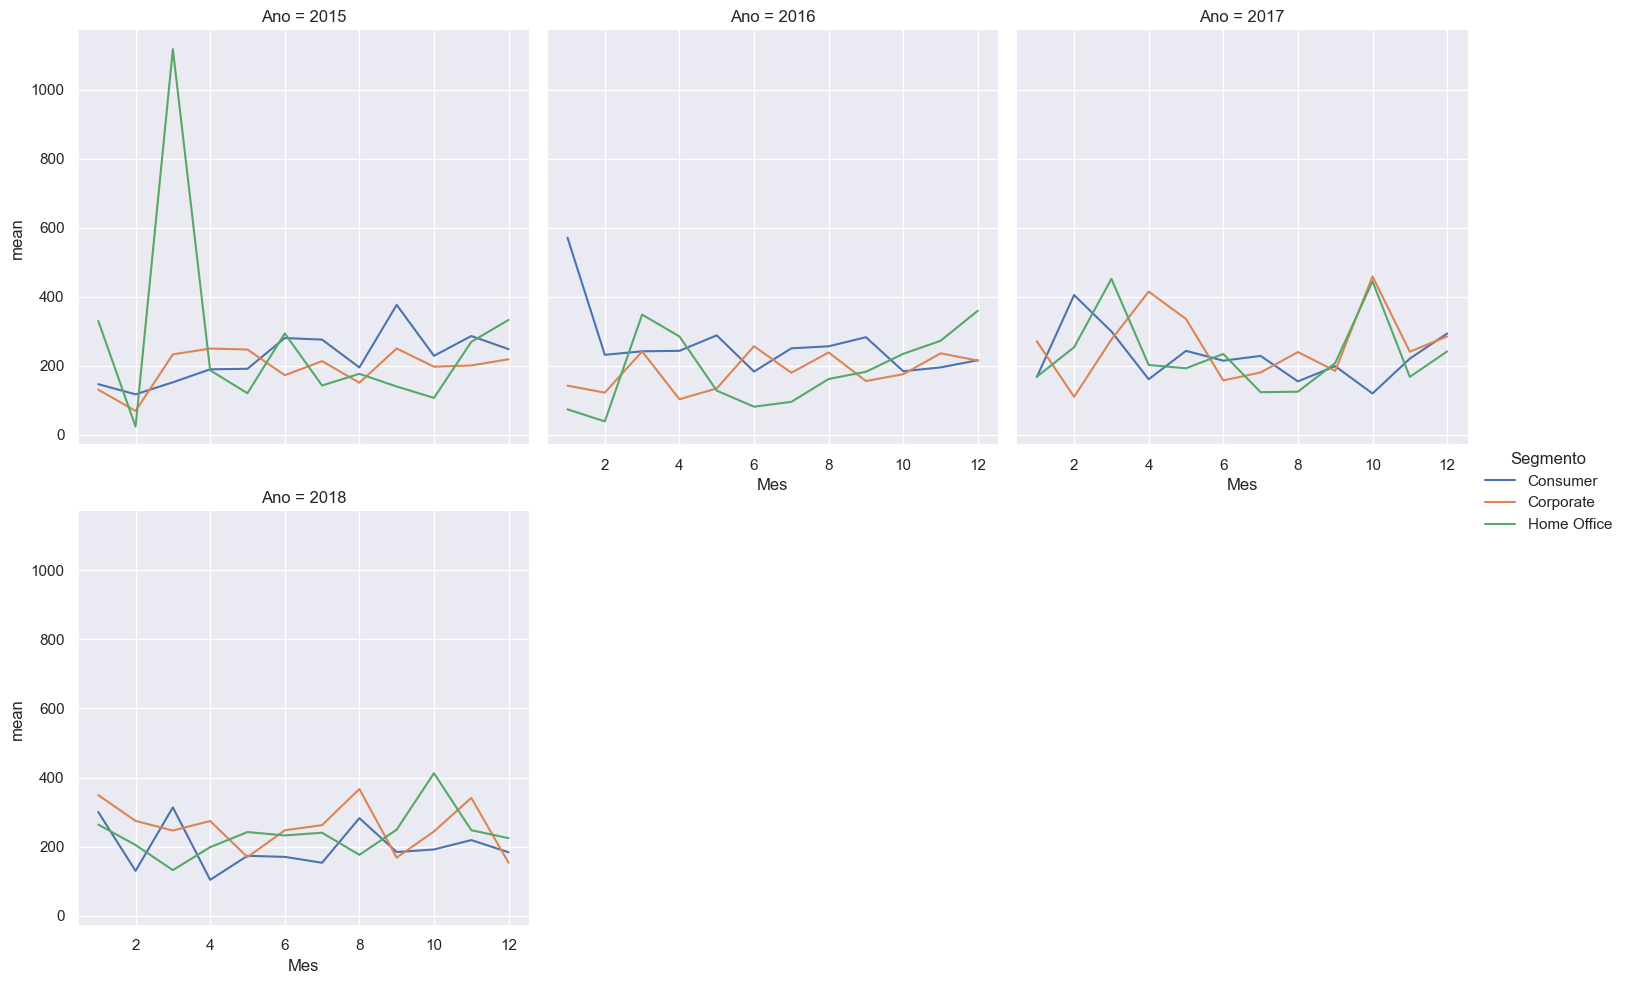

In [53]:
plt.figure(figsize=(20,6))
sns.set()
figl = sns.relplot(kind='line',
                  data = media_vendas_por_segmento,
                  y = 'mean',
                  x = meses,
                  hue = segmentos,
                  col = anos,
                  col_wrap = 3)

In [45]:


# •Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre 

In [84]:
df.groupby(['Categoria', 'SubCategoria', 'Mes', 'Ano'])['Valor_Venda'].sum().nlargest(12).reset_index().sort_values(by = 'Categoria', ascending= False)

,Categoria,SubCategoria,Mes,Ano,Valor_Venda
0,Technology,Machines,3,2015,25314.658
1,Technology,Copiers,10,2017,22899.860
2,Technology,Machines,9,2015,22420.282
3,Technology,Phones,11,2015,21534.296
4,Technology,Copiers,3,2018,21319.822
6,Technology,Phones,11,2018,17201.040
9,Technology,Phones,9,2018,15318.836
8,Office Supplies,Binders,12,2017,16774.399
5,Furniture,Chairs,12,2015,17234.974
7,Furniture,Chairs,9,2018,16911.669


In [ ]:
vendas_por_categoria = df.groupby(['Categoria', 'SubCategoria', 'Mes', 'Ano'])['Valor_Venda'].sum().nlargest(12).reset_index().sort_values(by = 'Categoria', ascending= False)

In [81]:
categorias = vendas_por_categoria.index.get_level_values(0)
subcategorias = vendas_por_categoria.index.get_level_values(1)
valor_venda = vendas_por_categoria.index.get_level_values(2)


IndexError: Too many levels: Index has only 1 level, not 2